In [38]:
import pandas as pd

In [39]:
import numpy as np

In [40]:
import matplotlib.pyplot as plt

In [41]:
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [42]:
plt.rcParams["figure.figsize"] = (9,6)

In [43]:
df = pd.read_csv('data/ec2_cpu_utilization_24ae8d.csv')

In [44]:
df.head()

,timestamp,value
0,2014-02-14 14:30:00,0.132
1,2014-02-14 14:35:00,0.134
2,2014-02-14 14:40:00,0.134
3,2014-02-14 14:45:00,0.134
4,2014-02-14 14:50:00,0.134


In [45]:
anomalies_timestamp = [
        "2014-02-26 22:05:00",
        "2014-02-27 17:15:00"
    ]

In [46]:
df['timestamp'] = pd.to_datetime(df['timestamp'])

In [47]:
df.head()

,timestamp,value
0,2014-02-14 14:30:00,0.132
1,2014-02-14 14:35:00,0.134
2,2014-02-14 14:40:00,0.134
3,2014-02-14 14:45:00,0.134
4,2014-02-14 14:50:00,0.134


In [48]:
df['is_anomaly'] = 1

In [49]:
df.head()

,timestamp,value,is_anomaly
0,2014-02-14 14:30:00,0.132,1
1,2014-02-14 14:35:00,0.134,1
2,2014-02-14 14:40:00,0.134,1
3,2014-02-14 14:45:00,0.134,1
4,2014-02-14 14:50:00,0.134,1


In [50]:
for each in anomalies_timestamp:
    df.loc[df['timestamp']==each, 'is_anomaly'] = -1

In [51]:
df.head()

,timestamp,value,is_anomaly
0,2014-02-14 14:30:00,0.132,1
1,2014-02-14 14:35:00,0.134,1
2,2014-02-14 14:40:00,0.134,1
3,2014-02-14 14:45:00,0.134,1
4,2014-02-14 14:50:00,0.134,1


In [52]:
print(df)

               timestamp  value  is_anomaly
0    2014-02-14 14:30:00  0.132           1
1    2014-02-14 14:35:00  0.134           1
2    2014-02-14 14:40:00  0.134           1
3    2014-02-14 14:45:00  0.134           1
4    2014-02-14 14:50:00  0.134           1
...                  ...    ...         ...
4027 2014-02-28 14:05:00  0.132           1
4028 2014-02-28 14:10:00  0.134           1
4029 2014-02-28 14:15:00  0.134           1
4030 2014-02-28 14:20:00  0.134           1
4031 2014-02-28 14:25:00  0.134           1

[4032 rows x 3 columns]


In [53]:
anomaly_df = df.loc[df['is_anomaly']==-1]
inlier_df = df.loc[df['is_anomaly']==1]

In [54]:
anomaly_df.index

Index([3547, 3777], dtype='int64')

In [55]:
inlier_df.index

Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
       ...
       4022, 4023, 4024, 4025, 4026, 4027, 4028, 4029, 4030, 4031],
      dtype='int64', length=4030)

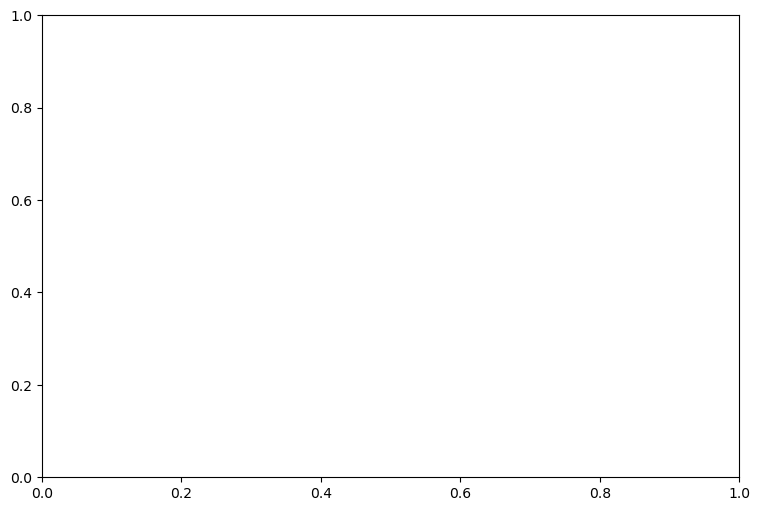

In [56]:
fig, ax =  plt.subplots()

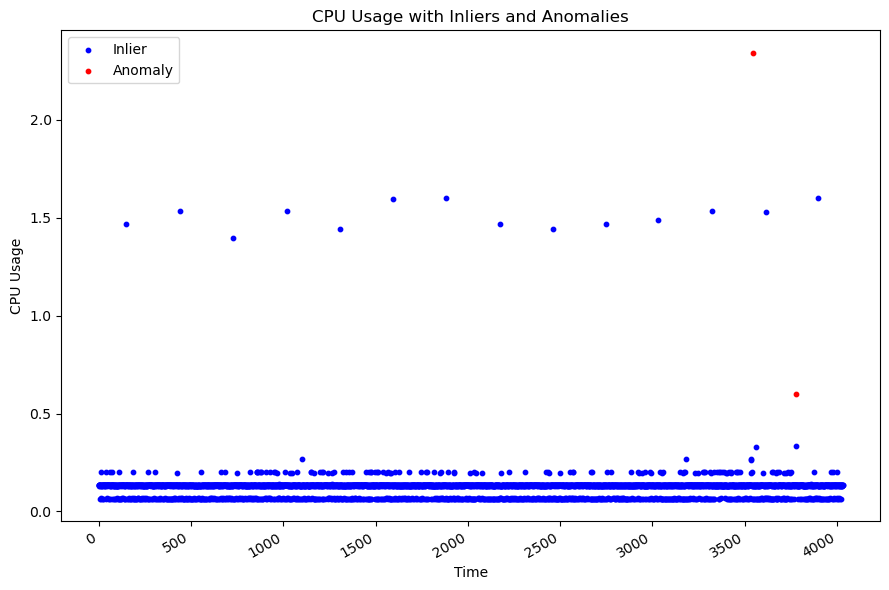

In [58]:
fig, ax = plt.subplots()  # Create figure and axes

ax.scatter(inlier_df.index, inlier_df['value'], color='blue', s=10, label='Inlier')
ax.scatter(anomaly_df.index, anomaly_df['value'], color='red', s=10, label='Anomaly')

ax.set_xlabel('Time')
ax.set_ylabel('CPU Usage')
ax.legend(loc='upper left')  # Adjust legend location as needed
plt.title('CPU Usage with Inliers and Anomalies')  # Add a title

plt.grid(False)
fig.autofmt_xdate()
plt.tight_layout()
plt.show()

In [59]:
print(inlier_df)

               timestamp  value  is_anomaly
0    2014-02-14 14:30:00  0.132           1
1    2014-02-14 14:35:00  0.134           1
2    2014-02-14 14:40:00  0.134           1
3    2014-02-14 14:45:00  0.134           1
4    2014-02-14 14:50:00  0.134           1
...                  ...    ...         ...
4027 2014-02-28 14:05:00  0.132           1
4028 2014-02-28 14:10:00  0.134           1
4029 2014-02-28 14:15:00  0.134           1
4030 2014-02-28 14:20:00  0.134           1
4031 2014-02-28 14:25:00  0.134           1

[4030 rows x 3 columns]


## MAD median absolute deviation

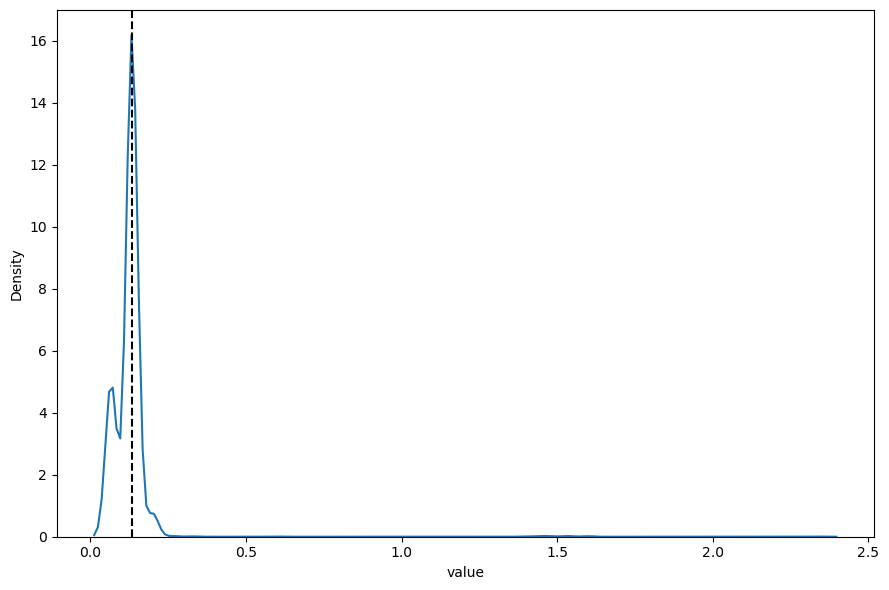

In [65]:
import seaborn as sns

sns.kdeplot(df['value'])
plt.grid(False)
plt.axvline(0.134,0,1,c='black', ls='--')
plt.tight_layout()

In [67]:
df['value'].median()

0.134

In [69]:
from scipy.stats import median_abs_deviation

mad = median_abs_deviation(df['value'])
median = np.median(df['value'])

print(median)
print(mad)

0.134
0.0020000000000000018


In [70]:
def compute_robust_z_score(x):
    return 0.6745*(x-median)/mad


In [71]:
df['z-score'] = df['value'].apply(compute_robust_z_score)
df.head()

,timestamp,value,is_anomaly,z-score
0,2014-02-14 14:30:00,0.132,1,-0.6745
1,2014-02-14 14:35:00,0.134,1,0.0000
2,2014-02-14 14:40:00,0.134,1,0.0000
3,2014-02-14 14:45:00,0.134,1,0.0000
4,2014-02-14 14:50:00,0.134,1,0.0000


In [73]:
# determine if it is an anomaly using threshold of 3.5
df['baseline'] = 1

df.loc[df['z-score']>=3.5,'baseline'] = -1
df.loc[df['z-score']<=-3.5,'baseline'] = -1

df.head()

,timestamp,value,is_anomaly,z-score,baseline
0,2014-02-14 14:30:00,0.132,1,-0.6745,1
1,2014-02-14 14:35:00,0.134,1,0.0000,1
2,2014-02-14 14:40:00,0.134,1,0.0000,1
3,2014-02-14 14:45:00,0.134,1,0.0000,1
4,2014-02-14 14:50:00,0.134,1,0.0000,1


## evaluation


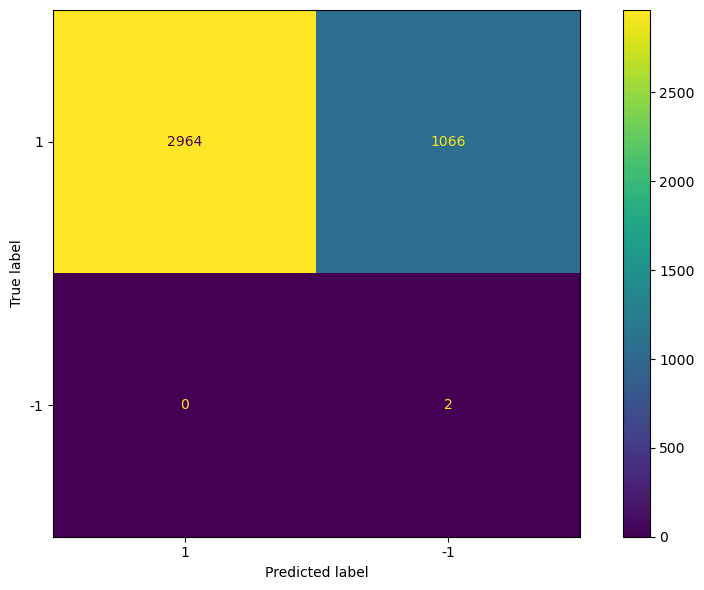

In [79]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(df['is_anomaly'],df['baseline'],labels=[1,-1])

disp_cm = ConfusionMatrixDisplay(cm,display_labels=[1,-1])

disp_cm.plot();

plt.grid(False)
plt.tight_layout()

## isolation forest


In [80]:
from sklearn.ensemble import IsolationForest

In [81]:
train = df[:3550]
test = df[3550:]

In [84]:
contamination = 1 / len(train)

iso_forest = IsolationForest(contamination=contamination,random_state=42)
print(train['value'])
X_train = train['value'].values.reshape(-1,1)
print(X_train)

0       0.132
1       0.134
2       0.134
3       0.134
4       0.134
        ...  
3545    0.132
3546    0.132
3547    2.344
3548    0.134
3549    0.066
Name: value, Length: 3550, dtype: float64
[[0.132]
 [0.134]
 [0.134]
 ...
 [2.344]
 [0.134]
 [0.066]]


In [85]:
iso_forest.fit(X_train)

IsolationForest(contamination=0.00028169014084507044, random_state=42)

In [86]:
preds_iso_forst = iso_forest.predict(test['value'].values.reshape(-1,1))

In [87]:
print(preds_iso_forst)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1]


In [89]:
cm = confusion_matrix(test['is_anomaly'],preds_iso_forst,labels=[1,-1])

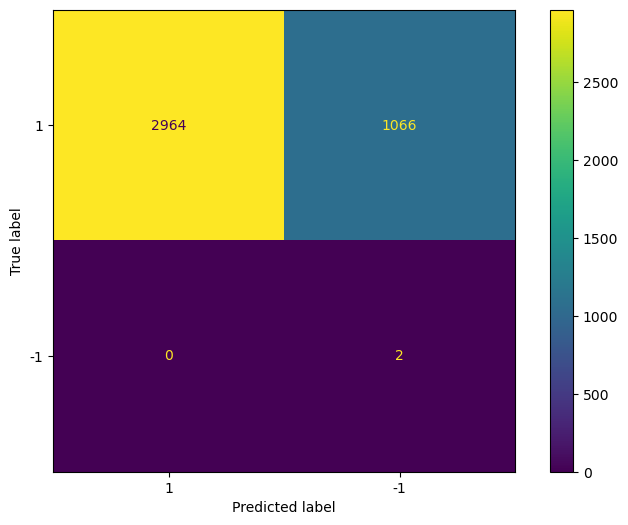

In [92]:
displ_cm = ConfusionMatrixDisplay(cm, display_labels=[1,-1])

disp_cm.plot();

## Local Outlier Factor (LOF)


In [94]:
from sklearn.neighbors import LocalOutlierFactor

lof = LocalOutlierFactor(contamination=contamination, novelty=True)

In [96]:
lof.fit(X_train)

LocalOutlierFactor(contamination=0.00028169014084507044, novelty=True)

In [97]:
preds_lof = lof.predict(test['value'].values.reshape(-1,1))

In [98]:
cm = confusion_matrix(test['is_anomaly'], preds_lof, labels = [1,-1])

In [100]:
disp_cm =  ConfusionMatrixDisplay(cm,display_labels=[1,-1])

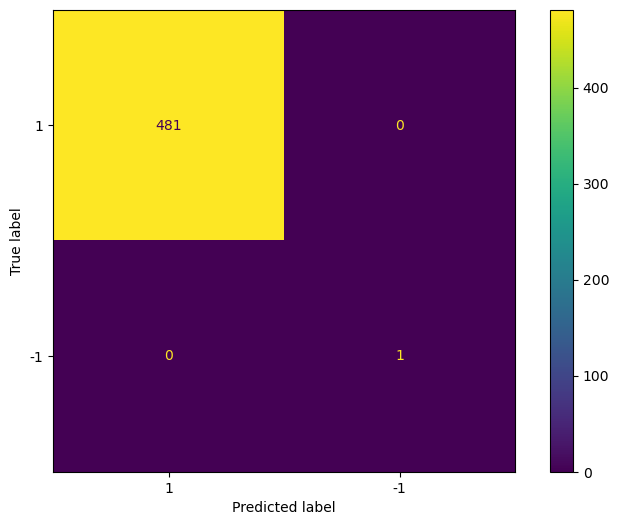

In [101]:
disp_cm.plot()